#                Continuous Wavelet Transform (CWT)

This code is related to the following section of [the paper](https://arxiv.org/abs/2403.17181):

## Section III:  SIGNAL TRANSFORMATION AND ANALYSIS
### D.  Wavelet Transform
### 1.  Continuous Wavelet Transform (CWT)

For more details please refer to [the paper](https://arxiv.org/abs/2403.17181).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
plt.rc('font',family='Times New Roman')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Create composite sinusoidal signal:

# Constants
fs_sin3 = 1600# Sampling frequency
#t = np.arange(0,  1, 1/fs) # Time vector
t_sin3 = np.arange(0, 512*3/fs_sin3, 1/fs_sin3) 

signal1 = 10*np.sin(2 * np.pi * 100 * t_sin3[:960]) 
signal2 = 5 * np.sin(2 * np.pi * 400 *t_sin3[960:1024])
signal3 = 20 * np.sin(2 * np.pi * 200 * t_sin3[1024:])
sin3 = np.concatenate([signal1, signal2, signal3])

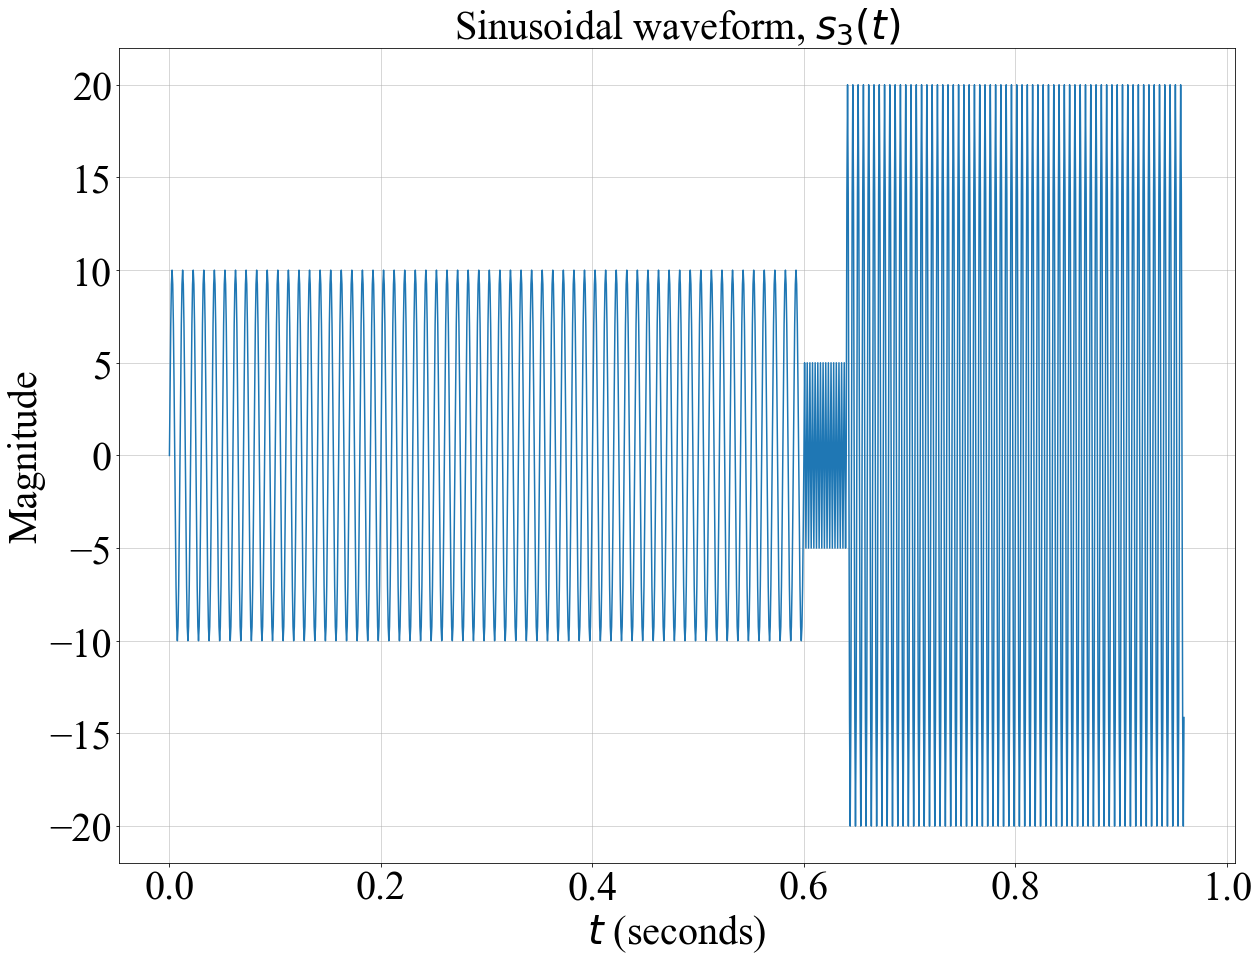

In [3]:
# Plot the signal
plt.figure(figsize=(20, 15))
plt.plot(t_sin3, sin3)
plt.title('Sinusoidal waveform, $s_3(t)$', fontsize = 40)
plt.xlabel('$t$ (seconds)', fontsize = 40)
plt.ylabel('Magnitude', fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize= 40)
#plt.xticks([])  
#plt.yticks([])  
plt.grid(which='both', linestyle='-', linewidth='0.5')
plt.show()


In [4]:
# Available continuous-time wavelets functions:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

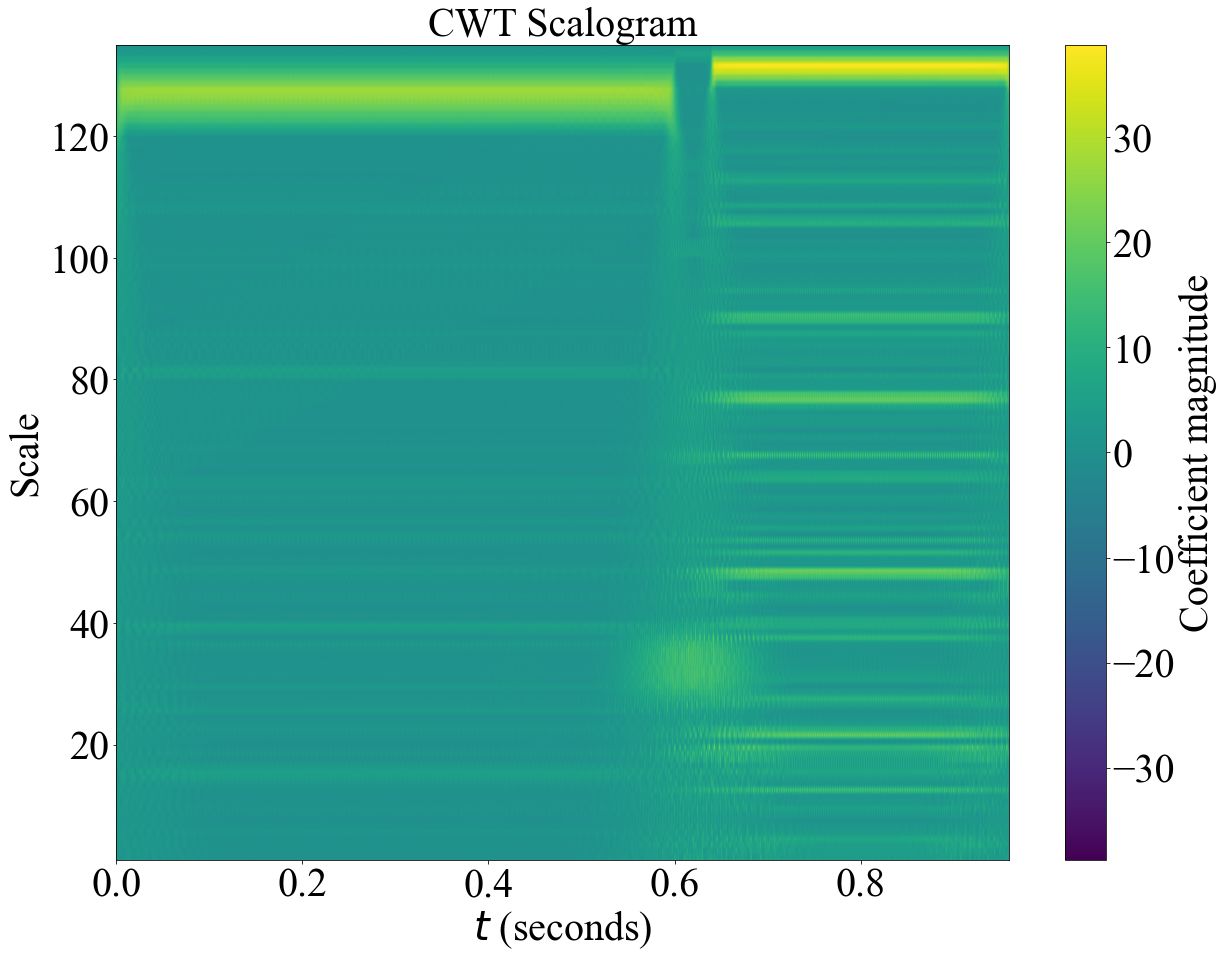

In [5]:
#CWT: 

scale_max = 135 # Define max. scale
scales = np.arange(1, scale_max)
wavelet_func = 'fbsp'
#  Apply CWT

coefficients, f_cwt = pywt.cwt(sin3, scales, wavelet_func, 1/fs_sin3)

# Plot scalogram
plt.figure(figsize=(20, 15))
plt.imshow(abs(coefficients), extent=[0, max(t_sin3), 1, scale_max], aspect='auto',
         vmax=abs(coefficients).max(), vmin= -abs(coefficients).max())  

plt.title('CWT Scalogram', fontsize = 40)
plt.ylabel('Scale', fontsize = 40)
plt.xlabel('$t$ (seconds)', fontsize = 40)
cb = plt.colorbar()
cb.set_label(label='Coefficient magnitude', size=40)
cb.ax.tick_params(labelsize=40) 
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize= 40)

plt.show()